In [91]:
import pandas as pd
from prophet  import  Prophet
covid = pd.read_csv('owid-covid-data.csv')
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [92]:


covid['date'] = pd.to_datetime(covid['date'])
covid['new_cases'][covid['location']=='South Korea']
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192301 entries, 0 to 192300
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    192301 non-null  object        
 1   continent                                   181123 non-null  object        
 2   location                                    192301 non-null  object        
 3   date                                        192301 non-null  datetime64[ns]
 4   total_cases                                 184750 non-null  float64       
 5   new_cases                                   184508 non-null  float64       
 6   new_cases_smoothed                          183334 non-null  float64       
 7   total_deaths                                166260 non-null  float64       
 8   new_deaths                                  166241 non-null  float64      

In [93]:

df = covid[['date','new_cases']][covid['location']=='South Korea']
df.rename(columns={'date': 'ds','new_cases':'y'},inplace=True)
df

,ds,y
160818,2020-01-22,NaN
160819,2020-01-23,0.0
160820,2020-01-24,1.0
160821,2020-01-25,0.0
160822,2020-01-26,1.0
...,...,...
161681,2022-06-03,12016.0
161682,2022-06-04,9835.0
161683,2022-06-05,5022.0
161684,2022-06-06,6172.0


In [94]:
model = Prophet()
model.fit(df)

14:10:45 - cmdstanpy - INFO - Chain [1] start processing
14:10:45 - cmdstanpy - INFO - Chain [1] done processing


In [95]:
future = model.make_future_dataframe(periods=1000)


In [96]:
forecast = model.predict(future)


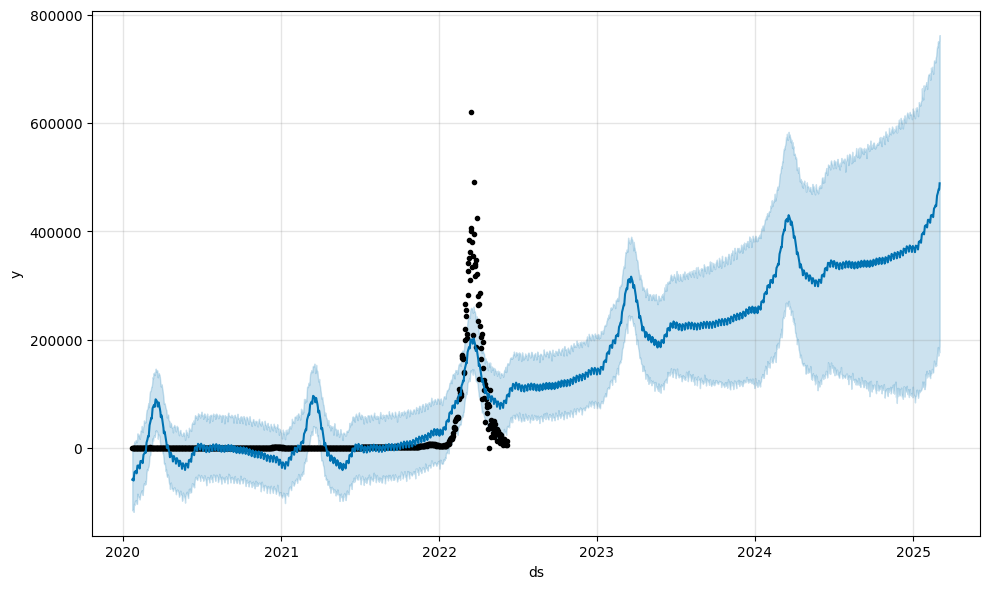

In [97]:
fig1 = model.plot(forecast)

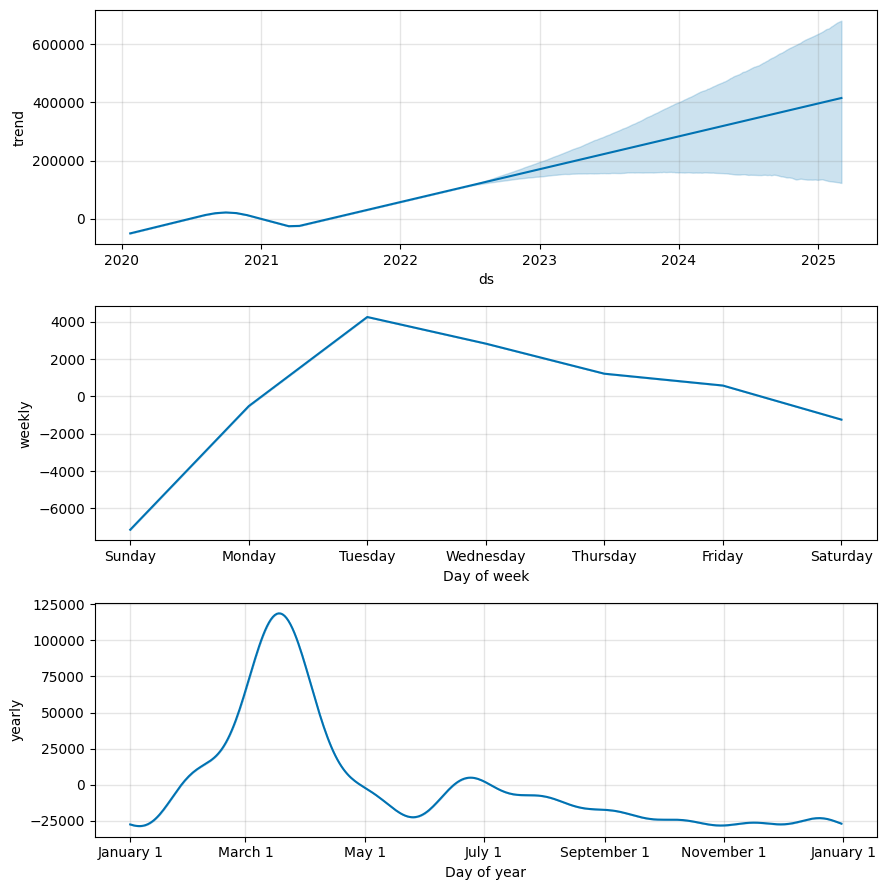

In [98]:
fig2 = model.plot_components(forecast)

14:10:47 - cmdstanpy - INFO - Chain [1] start processing
14:10:47 - cmdstanpy - INFO - Chain [1] done processing


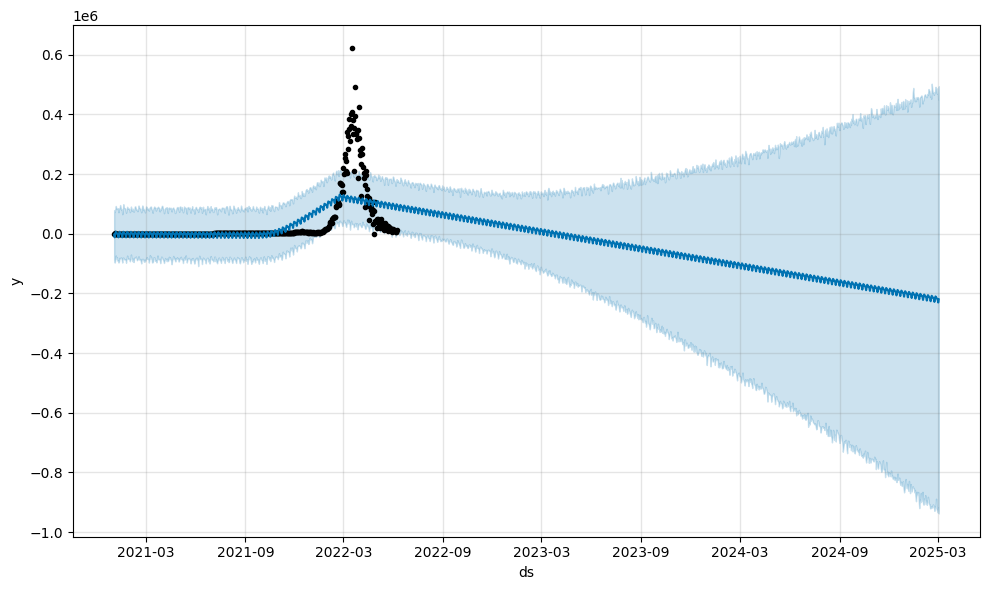

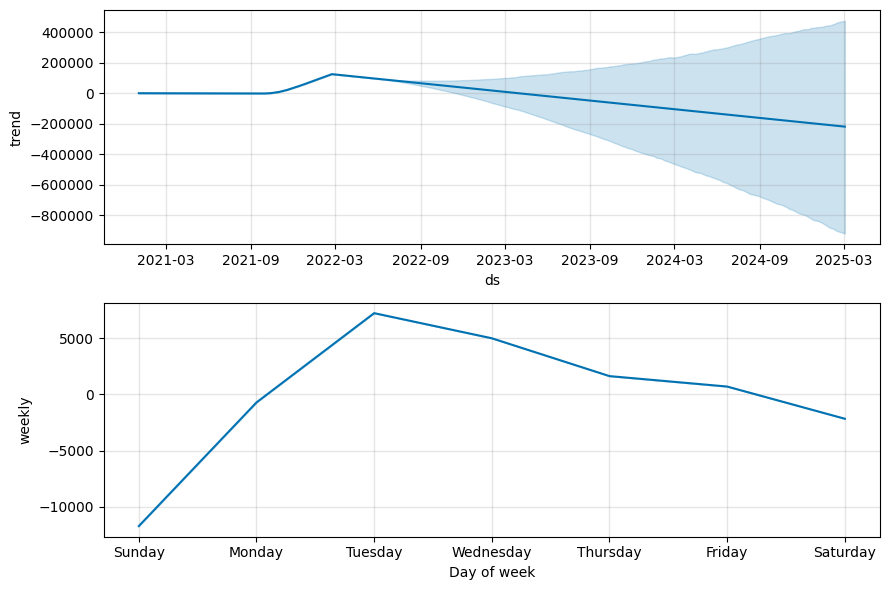

In [99]:
m2 = Prophet()
df2 = df[df['ds']>'2021-01-01']
m2.fit(df2)
future2 = m2.make_future_dataframe(periods=1000)
forecast2 = m2.predict(future2)
fig3 = m2.plot(forecast2)
fig4 = m2.plot_components(forecast2)

In [100]:
from prophet.plot import plot_plotly
plot_plotly(m2,forecast2)

In [118]:
raw_data = pd.read_csv('survey_results_public.csv')
data_analyst_data = raw_data[raw_data['DevType'].isin(['Data scientist or machine learning specialist', 'Data or business analyst'])]
devtype = raw_data['DevType'].str.split(';')
devtype


0                                                      NaN
1                                                      NaN
2        [Data scientist or machine learning specialist...
3                                  [Developer, full-stack]
4        [Developer, front-end, Developer, full-stack, ...
                               ...                        
73263                                [Developer, back-end]
73264      [Data scientist or machine learning specialist]
73265    [Developer, full-stack, Developer, desktop or ...
73266    [Developer, front-end, Developer, desktop or e...
73267    [Developer, front-end, Engineer, data, Enginee...
Name: DevType, Length: 73268, dtype: object

In [102]:
devtype.dropna(inplace=True)
exp_dev = devtype.explode()

In [103]:
#data_analyst_data = raw_data[raw_data['DevType'].isin(['Data scientist or machine learning specialist', 'Data or business analyst'])]
data_dev = exp_dev[(exp_dev=='Data scientist or machine learning specialist') | (exp_dev == 'Data or business analyst') ]

In [104]:
languages = data_analyst_data['LanguageHaveWorkedWith']
#데이터 확인
languages
#프로그래밍 언어 데이터 추출
languages = data_analyst_data['LanguageHaveWorkedWith']
#데이터 확인
languages
#데이터 문자열 변환 후 구분자(;)로 구분
languages = languages.str.split(';')

#데이터 확인
languages
#리스트 항목을 행으로 나누기
exploded_languages = languages.explode()

#데이터 확인
exploded_languages
#프로그래밍 별 응답 수 구하기
size_by_languages = exploded_languages.groupby(exploded_languages).size()

#데이터 빈도 역순으로 정렬
size_by_languages.sort_values(ascending=False, inplace=True)
size_by_languages
#데이터프레임 만들기 위한 딕셔너리 만들기
frame = {'language': size_by_languages.index, 'count': size_by_languages.values}

#데이터프레임 만들기
size_by_languages_df = pd.DataFrame(frame)
size_by_languages_df.head(10)
#매트플랏립 라이브러리 탑재
import matplotlib.pyplot as plt

#Wordcloud 라이브러리 탑재
from wordcloud import WordCloud\
#데이터프레임을 딕셔너리로 변경하기
size_by_languages.to_dict()
#plotly.express 모듈 탑재
import plotly.express as px

#트리맵 그리기
fig = px.treemap(size_by_languages_df, path=['language'], values='count')
fig.show()
#결손치 제거
languages.dropna(inplace=True)

#필터링을 위한 리스트로 변환
lang_list = languages.to_list()

#일부 값 확인
lang_list[:10]

[['HTML/CSS', 'Python', 'Ruby', 'SQL', 'VBA'],
 ['Bash/Shell', 'C++', 'Python', 'SQL'],
 ['Bash/Shell', 'Python', 'SQL'],
 ['Python'],
 ['Elixir', 'Python', 'Rust', 'SQL', 'TypeScript'],
 ['Python'],
 ['Bash/Shell',
  'C++',
  'HTML/CSS',
  'JavaScript',
  'Python',
  'Rust',
  'SQL',
  'TypeScript'],
 ['Python', 'SQL'],
 ['Bash/Shell', 'Go', 'HTML/CSS', 'Python'],
 ['Bash/Shell', 'Python', 'Rust']]

In [109]:
target_langs = ['Python', 'R', 'SQL','MATLAB', 'Go', 'SAS', 'Scala', 'Julia', 'Java', 'JavaScript']
#필터링 완료된 프로그래밍 언어를 담기 위한 리스트 생성
revised_lang_list = []

#필터링을 위해 전체 리스트 순회
for lang in lang_list:

#추출 대상 프로그래밍 언어만 필터링
    filtered = [x for x in lang if x in target_langs]
    if 'Python' in filtered:
        revised_lang_list.append(filtered)
    

In [110]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()

te_ary = te.fit(revised_lang_list).transform(revised_lang_list)
te_ary

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False,  True, False, ..., False,  True,  True],
       [False, False,  True, ..., False,  True, False]])

In [114]:
new_languages = pd.DataFrame(te_ary, columns=te.columns_)
new_languages

,Go,Java,JavaScript,Julia,MATLAB,Python,R,SAS,SQL,Scala
0,False,False,False,False,False,True,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False
2,False,False,False,False,False,True,False,False,True,False
3,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
619,False,False,False,False,False,True,False,False,False,False
620,False,False,False,False,False,True,False,False,False,False
621,False,False,False,False,False,True,False,False,True,False
622,False,True,False,False,False,True,False,False,True,True


In [115]:
#학습 알고리즘 탑재
from mlxtend.frequent_patterns import apriori, association_rules

#지지도 구하기
freq_items = apriori(new_languages, min_support=0.01, use_colnames=True, verbose=1)

Processing 6 combinations | Sampling itemset size 654


In [116]:
#학습 결과 확인하기
freq_items.sort_values(['support'], ascending=False).head(20)
#항목 집합의 항목 개수 추가하기
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
freq_items
#신뢰도와 향상도 구하기
rules = association_rules(freq_items, min_threshold=0.01)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Go),(JavaScript),0.033654,0.246795,0.016026,0.476190,1.929499,0.007720,1.437937,0.498507
1,(JavaScript),(Go),0.246795,0.033654,0.016026,0.064935,1.929499,0.007720,1.033454,0.639574
2,(Go),(Python),0.033654,1.000000,0.033654,1.000000,1.000000,0.000000,inf,0.000000
3,(Python),(Go),1.000000,0.033654,0.033654,0.033654,1.000000,0.000000,1.000000,0.000000
4,(Go),(SQL),0.033654,0.604167,0.020833,0.619048,1.024631,0.000501,1.039063,0.024876
...,...,...,...,...,...,...,...,...,...,...
529,(Java),"(JavaScript, Python, Scala, SQL)",0.115385,0.014423,0.011218,0.097222,6.740741,0.009554,1.091716,0.962733
530,(JavaScript),"(Python, Scala, SQL, Java)",0.246795,0.012821,0.011218,0.045455,3.545455,0.008054,1.034188,0.953191
531,(Python),"(JavaScript, Scala, SQL, Java)",1.000000,0.011218,0.011218,0.011218,1.000000,0.000000,1.000000,0.000000
532,(SQL),"(JavaScript, Python, Scala, Java)",0.604167,0.011218,0.011218,0.018568,1.655172,0.004440,1.007489,1.000000
